## Sesión 4

## Estimadores de máxima verosimilitud

```{figure} ../images/sesion4-intro.png
:alt: representacion
:fig-align: center
:width: 600px

Conceptos clave de la sesión 4.
```

**¿Cómo pasamos de una idea teórica de cómo se generan los datos a una estimación concreta con evidencia empírica?**

Todo empieza con una suposición sobre cómo se generan los datos. Hoy vamos a recorrer el camino que nos lleva desde esa suposición hasta una distribución concreta estimada a partir de una muestra.

### Modelos probabilísticos

Un _modelo probabilístico_ es una especificación de la **distribución conjunta de las variables aleatorias** involucradas en el problema, condicionada (o no) por un conjunto de **párametros desconocidos.**

$$
\text{Modelo:} \quad P(X_1, X_2, \dots, X_n \mid \theta)
$$

Donde:

- $X_1, \dots, X_n$ son las variables aleatorias (datos observados, y posiblemente también variables latentes).

- $\theta \in \Theta$ es el vector de parámetros desconocidos.

### Familia de distribuciones

Es el conjunto de todas las distribuciones que podría explicar los datos, dependienteo del valor del párametro desconocido.

```{figure} ../images/familia_distribuciones_gamma.png
:alt: representacion
:fig-align: center
:width: 600px

Familia de distribuciones Gamma.
```

No confudir con que hay distintas distribuciones que podría explicar los datos...

```{figure} ../images/comparacion_distribuciones_ajustadas.png
:alt: representacion
:fig-align: center
:width: 600px

Comparación de distribuciones ajustadas a los datos.
```

### Muestra observada

Se denota por $\mathcal{D} = \{x_1, x_2, \dots, x_n\}$ o como $\mathcal{X}$. Es el conjunto de datos observados.

#### Supuesto _i.i.d._

Cuando trabajamos con una muestra $X_1, \dots, X_n$, comúnmente asumimos que los datos son:

- **Independientes**: El conocimiento de un valor no da información sobre otro.
- **Idénticamente distribuidos**: Todos siguen la misma distribución $f(x; \theta)$

Esto se denota como:

$$
X_1, \dots, X_n \overset{\text{i.i.d.}}{\sim} f(x; \theta)
$$

Esta asunción es clave para **derivar** la función de verosimilitud, ya que permite factorizarla como:

$$
L(\theta) = \prod_{i=1}^{n} f(x_i; \theta)
$$

Donde:

- $L(\theta)$ es la **función de verosimilitud**
- $x_i$ son las observaciones de la muestra
- $\theta$ es el parámetro del modelo

### Estimador de máxima verosimilitud

A partir de la muestra, queremos encontrar _el mejor valor posible del parámetro_ $\theta$ que maximiza la probabilidad de observar los datos. 

Un estimador, como MLE _(Maximum Likelihood Estimator)_, es el mecanismo que nos permite hacerlo. 

#### Matemáticas detrás del MLE

Aquí la clave, es la palabara "**maximizar**". Queremos encontrar el valor de $\theta$ que maximiza la función de verosimilitud $L(\theta)$.

Así que vamos a tener distintas partes importantes en el proceso para llegar a ese valor óptimo:

1. Ya sabemos que si asumimos que los datos son _i.i.d._:

$$
X_1, X_2, \dots, X_n \overset{\text{i.i.d.}}{\sim} f(x; \theta)
$$

Entonces la **función de verosimilitud** es:

$$
L(\theta) = \prod_{i=1}^n f(x_i; \theta)
$$


2. La **log-verosimilitud** es:

Usualmente se trabaja con el **logaritmo** de la verosimilitud para facilitar el cálculo:

$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \log f(x_i; \theta)
$$

```{admonition} ¿Por qué usar la log-verosimilitud?
:class: tip

- Transforma productos en sumas, lo que **simplifica el cálculo**.
- Hace más manejable la derivación, especialmente con distribuciones exponenciales.
- Conserva la ubicación del máximo porque $\log(\cdot)$ es monótona creciente.
``` 

3. Encontrar el **máximo**:

    a. Derivar la log-verosimilitud respecto del parámetro $\theta$

    b. Igualar a cero

    c. Resolver para $\theta$

    d. $\hat{\theta} = \arg\max_{\theta} \ell(\theta)$

```{admonition} Recuerda
:class: tip

* Si el modelo tiene _un solo parámetro_, se usa **cálculo diferencial** convencional:

$$
\frac{d}{d\theta} \ell(\theta) = 0
$$

* Si el modelo tiene _dos o más parámetros_:

Se utilizan **derivadas parciales**, una por cada parámetro:

$$
\frac{\partial}{\partial \theta_1} \ell(\theta_1, \theta_2) = 0
\qquad \text{y} \qquad
\frac{\partial}{\partial \theta_2} \ell(\theta_1, \theta_2) = 0
$$
```

4. Verificar que es un máximo:

    a. Calcular la segunda derivada (o matriz Hessiana si hay varios parámetros).

    b. Dado que tenemos un problema en un dominio cerrado $0 \leq \theta \leq 1$, podemos evaluar en los extremos:

        - $p(55 | \theta=0) = p(55 | \theta=1) = 0$
   
   y en el punto crítico: $\hat{\theta}$.

## Ejercicio: Máxima verosimilitud para distribuciones discretas

De clases pasadas, sabemos que el experimento de tirar la moneda $n$ veces y contar el número de caras, sigue una distribución $\text{Binomial}(n,\theta)$, con pmf

$$
p(a) = \left(\begin{array}{c}n \\ a \end{array}\right) \theta^a (1 - \theta)^{n-a}
$$

donde $a$ es el número de caras.

En un ejemplo concreto, supongamos que se tiró la moneda 100 veces y contamos 55 caras. Por tanto, sabemos que

$$
p(55) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \theta^{55}(1 - \theta)^{45}
$$

Observamos que la probabilidad de obtener 55 caras depende del valor de $\theta$, por lo que es usual incluir esto con la notación de probabilidad condicional:

$$
p(55 | \theta) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \theta^{55}(1 - \theta)^{45}
$$

Lo anterior, lo podemos leer como: "la probabilidad de obtener 55 caras dado que la probabilidad de cara en un tiro individual es $\theta$".

### _por método numérico_

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [7]:
# Calculermos la función de verosimilitud con los datos del ejemplo

n = 100
a = 55
theta = np.linspace(0, 1, 1001)

# Función de verosimilitud (evaluada)
L = math.comb(n, a) * theta**a * (1-theta)**(n-a)

In [8]:
# L --> es un vector de verosimilitudes para cada posible valor de theta
L

array([0.00000000e+000, 5.87432611e-137, 2.02318316e-120, ...,
       1.93660326e-093, 5.81584649e-107, 0.00000000e+000], shape=(1001,))

In [9]:
# Aproximar el valor máximo de la verosimilitud
theta[np.argmax(L)]  # 0.55

np.float64(0.55)

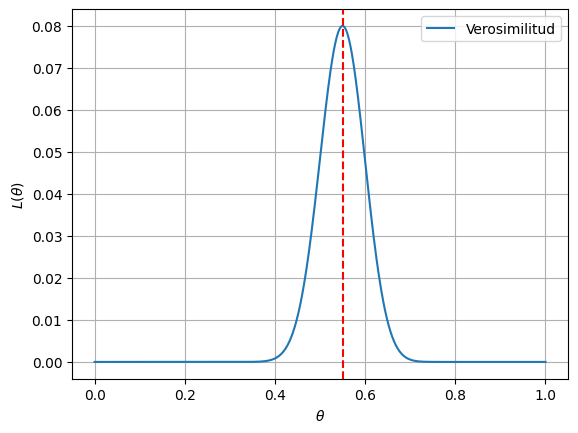

In [10]:
# Grafiquemos la función de verosimilitud
plt.plot(theta, L, label='Verosimilitud')
plt.axvline(theta[np.argmax(L)], color='red', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')
plt.legend()
plt.grid()

> ¿qué pasa en el caso en donde se aumente la cantidad de muestras?

In [ ]:
# de nuevo, pero con más datos:
n_ = 1000
a_ = 550

theta_ = np.linspace(0, 1, 1001)
L_ = math.comb(n_, a_) * theta_**a_ * (1-theta_)**(n_-a_)

In [ ]:
# Aproximar el valor máximo de la verosimilitud
theta[np.argmax(L_)]

np.float64(0.55)

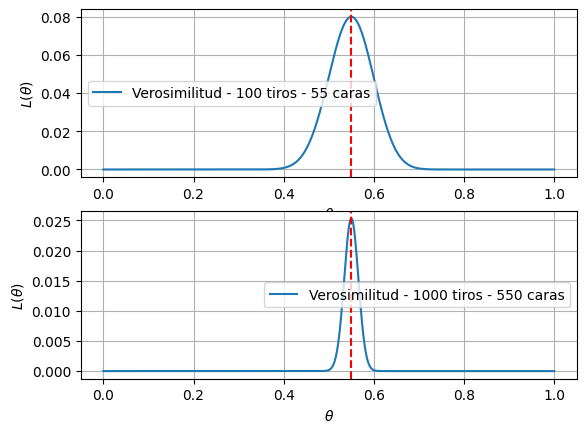

In [13]:
# Graficamos las funcines de verosimilitud
plt.subplot(2, 1, 1)
plt.plot(theta, L, label='Verosimilitud - 100 tiros - 55 caras')
plt.axvline(theta[np.argmax(L)], color='red', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(theta_, L_, label='Verosimilitud - 1000 tiros - 550 caras')
plt.axvline(theta_[np.argmax(L_)], color='red', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')
plt.legend()
plt.grid()

> ¿En cuál de los dos valores estimados $\hat{\theta}$ confías más?

### _por método analítico_

<details>
<summary>Descubrir</summary>

$$
\frac{d}{d\theta} p(55 | \theta) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \left(55\theta^{54}(1 - \theta)^{45} - 45\theta^{55}(1 - \theta)^{44}\right)
$$

Igualando a cero:

$$
\begin{align} \nonumber
55\theta^{54}(1 - \theta)^{45} = 45\theta^{55}(1 - \theta)^{44} \\ \nonumber
55(1 - \theta) = 45\theta \\ \nonumber
55 = 100 \theta
\end{align}
$$

Por lo que el MLE es $\hat{\theta} = \frac{55}{100}$.
</details>

### _i.i.d. y log verosimilitud_

In [14]:
# Función de log-verosimilitud
log_likelihood = np.log(float(math.comb(n, a))) + a * np.log(theta) + (n - a) * np.log(1 - theta)

C:\Users\paty\AppData\Local\Temp\ipykernel_8000\3167649693.py:2: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(float(math.comb(n, a))) + a * np.log(theta) + (n - a) * np.log(1 - theta)


In [ ]:
# Aproximar el valor máximo de la verosimilitud
theta[np.argmax(log_likelihood)]

np.float64(0.55)

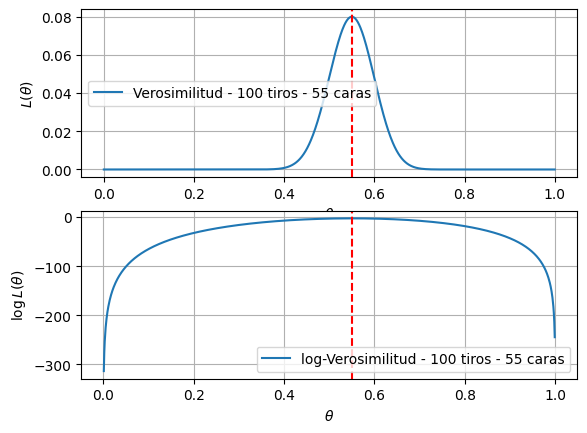

In [16]:
# Graficamos las funciones de log-verosimilitud y verosimilitud
plt.subplot(2, 1, 1)
plt.plot(theta, L, label='Verosimilitud - 100 tiros - 55 caras')
plt.axvline(theta[np.argmax(L)], color='red', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(theta, log_likelihood, label='log-Verosimilitud - 100 tiros - 55 caras')
plt.axvline(theta[np.argmax(log_likelihood)], color='red', linestyle='--')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\log L(\theta)$')
plt.legend()
plt.grid()

## Ejercicio: Máxima verosimilitud para distribuciones continuas

```{admonition} Todo aplica a distribuciones continuas
:class: hint

En el caso que acabamos de analizar teníamos una distribución discreta $\text{Binomial}$, y obtuvimos la función de verosimilitud usando la pmf. Para distribuciones continuas, todo lo que vimos es completamente aplicable, solo que usaremos la pdf.
```

Suponemos que el tiempo de vida de los bombillos es modelado por una distribución exponencial con parámetro desconocido $\lambda$. Probamos 5 bombillos, y observamos que tienen tiempos de vida de 2, 3, 1, 3, y 4 años, respectivamente. ¿Cuál es el MLE para $\lambda$?

Distribución exponencial:

$$
f(x; \lambda) = \lambda e^{-\lambda x} \quad \text{para } x \geq 0
$$

<details>
<summary>Descubrir</summary>

Asumiendo i.i.d., tenemos que la densidad conjunta es:

$$
p(x_1, x_2, x_3, x_4, x_5 | \lambda) = p(x_1 | \lambda) p(x_2 | \lambda) p(x_3 | \lambda) p(x_4 | \lambda) p(x_5 | \lambda) = (\lambda e^{-\lambda x_1}) (\lambda e^{-\lambda x_2}) (\lambda e^{-\lambda x_3}) (\lambda e^{-\lambda x_4}) (\lambda e^{-\lambda x_5}) = \lambda^5 e^{-\lambda(x_1 + x_2 + x_3 + x_4 + x_5)}
$$

Ahora, viendo los datos como fijos, con $x_1=2$, $x_2=3$, $x_3=1$, $x_4=3$, y $x_5=4$, y $\lambda$ como variable, obtenemos la función de verosimilitud:

$$
L(\lambda) = p(2, 3, 1, 3, 4 | \lambda) = \lambda^5 e^{-13\lambda},
$$

y la log-verosimilitud:

$$
\log L(\lambda) = 5 \log \lambda - 13 \lambda.
$$

Finalmente, usamos cálculo para encontrar el MLE:

$$
\frac{d}{d \lambda} \log L(\lambda) = \frac{5}{\lambda} - 13
$$

Igualando a cero y despejando, obtenemos que el MLE es $\hat{\lambda} = \frac{5}{13}$.
</details>

<details>
<summary>Descubrir</summary>

Una vez hallado $\hat{\lambda} = \frac{5}{13}$, podemos construir la distribución estimada:

$$
f(x; \hat{\lambda}) = \frac{5}{13} e^{- \frac{5}{13} x}
$$

</details>

```{admonition} En términos sencillos

:class: note

- Antes tenías una *familia de distribuciones exponenciales*, una para cada posible valor de $\lambda$.
- Ahora tienes *una única distribución estimada* con $\hat{\lambda} = \frac{5}{13}$.

**¿Qué se puede hacer con esta distribución estimada?**

Con:

$$
f(x; \hat{\lambda}) = \frac{5}{13} e^{-\frac{5}{13}x}
$$

puedes:

- **Calcular probabilidades**, por ejemplo:

  $$
  P(X < 2) = \int_0^2 f(x; \hat{\lambda})\, dx
  $$

``` 

## Ejercicio: Máxima verosimilitud con más de un parámetro

En este caso tenemos:

- Variable aleatoria $X \sim \mathcal{N}(\mu, \sigma^2)$.

- $p(x | \mu,\sigma^2)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$.

Los estimadores de máxima verosimilitud de $\mu$ y $\sigma$ son:

$$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{j=1}^{N}x_j \qquad \text{y} \qquad \hat{\sigma}_{MLE} = \sqrt{\frac{1}{N}\sum_{j=1}^{N}(x_j-\hat{\mu}_{MLE})^2}.$$

In [17]:
# Númericamente:
from scipy import stats

In [18]:
# Parámetros reales de la dist. normal
mu_true = 10
sigma_true = 2
X = stats.norm(loc=mu_true, scale=sigma_true)

In [27]:
# Generamos muestras
n_samples = 10000
samples = X.rvs(n_samples)

In [28]:
# Parámetros de máxima versimilitud
mu_mle = np.mean(samples)
sigma_mle = np.sqrt(np.mean((samples - mu_mle)**2))

In [29]:
# Comparamos los parámetros reales con los de máxima verosimilitud
mu_true, mu_mle

(10, np.float64(9.95215118901094))

In [30]:
sigma_true, sigma_mle

(2, np.float64(2.0164196978525353))

In [33]:
# Forma más sencilla:
from scipy.stats import norm

# Ajustar distribución normal con MLE
mu_mle, sigma_mle = norm.fit(samples)

print(f"Parámetros estimados por MLE: mu = {mu_mle}, sigma = {sigma_mle}")

Parámetros estimados por MLE: mu = 9.95215118901094, sigma = 2.0164196978525353


## Comentarios finales

El principio de máxima verosimilitud es bastante poderoso, y además una técnica general para estimar los parámetros de un modelo probabilístico. 

 * _Overfitting_

Sin embargo, tiene un problema: **en caso de tener pocos datos de entrenamiento, podemos sobreajustar seriamente el modelo.**

 * _Suposición básica_

El principio de máxima verosimilitud es bastante intuitivo: estimar los parámetros de manera que se maximice la probabilidad de los datos. Esto trae consigo la suposición subyacente de que los parámetros **son fijos**, de manera que la incertidumbre proviene de los datos.